Import the libraries for EDA

In [105]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import regex as re

We first readin the file.

In [106]:
ori_data = pd.read_csv('training_data_202601.csv')
display(ori_data.head(5))

,unique_id,Painting,"On a scale of 1–10, how intense is the emotion conveyed by the artwork?",Describe how this painting makes you feel.,This art piece makes me feel sombre.,This art piece makes me feel content.,This art piece makes me feel calm.,This art piece makes me feel uneasy.,How many prominent colours do you notice in this painting?,How many objects caught your eye in the painting?,How much (in Canadian dollars) would you be willing to pay for this painting?,"If you could purchase this painting, which room would you put that painting in?","If you could view this art in person, who would you want to view it with?",What season does this art piece remind you of?,"If this painting was a food, what would be?",Imagine a soundtrack for this painting. Describe that soundtrack without naming any objects in the painting.
0,1,The Persistence of Memory,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,The Persistence of Memory,5.0,"The clocks are burnt on a hot desert, it embod...",4 - Agree,3 - Neutral/Unsure,2 - Disagree,1 - Strongly disagree,2.0,4.0,0,Bathroom,By yourself,Fall,Fries,A country song that contrasts nostalgia for th...
2,3,The Persistence of Memory,7.0,This painting makes me feel dread. The clock r...,4 - Agree,1 - Strongly disagree,1 - Strongly disagree,4 - Agree,4.0,3.0,$5,"Bathroom,Dining room","Coworkers/Classmates,By yourself",Fall,Sardines,A melancholy instrumental with a monotone voic...
3,4,The Persistence of Memory,7.0,Deflated,4 - Agree,1 - Strongly disagree,2 - Disagree,4 - Agree,10.0,7.0,a,"Bedroom,Bathroom",Coworkers/Classmates,Winter,a,q
4,5,The Persistence of Memory,7.0,The painting gives me a sense of calmness and ...,3 - Neutral/Unsure,4 - Agree,5 - Strongly agree,3 - Neutral/Unsure,4.0,6.0,300 dollars.,Living room,Friends,"Spring,Summer",Churros.,Radiohead's album in rainbows.


We first look through the descirption of each feature.

In [107]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 16 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   unique_id                                                                                                     1686 non-null   int64  
 1   Painting                                                                                                      1686 non-null   object 
 2   On a scale of 1–10, how intense is the emotion conveyed by the artwork?                                       1621 non-null   float64
 3   Describe how this painting makes you feel.                                                                    1611 non-null   object 
 4   This art piece makes me feel sombre.                  

The name of the columns are too complicated, thus we rename them.

In [108]:
display(ori_data.columns)

Index(['unique_id', 'Painting',
       'On a scale of 1–10, how intense is the emotion conveyed by the artwork?',
       'Describe how this painting makes you feel.',
       'This art piece makes me feel sombre.',
       'This art piece makes me feel content.',
       'This art piece makes me feel calm.',
       'This art piece makes me feel uneasy.',
       'How many prominent colours do you notice in this painting?',
       'How many objects caught your eye in the painting?',
       'How much (in Canadian dollars) would you be willing to pay for this painting?',
       'If you could purchase this painting, which room would you put that painting in?',
       'If you could view this art in person, who would you want to view it with?',
       'What season does this art piece remind you of?',
       'If this painting was a food, what would be?',
       'Imagine a soundtrack for this painting. Describe that soundtrack without naming any objects in the painting.'],
      dtype='object')

In [109]:
ori_data = ori_data.rename(columns={'Painting': 'painting',
                                    'On a scale of 1–10, how intense is the emotion conveyed by the artwork?': 'emotion_rating',
                                    'Describe how this painting makes you feel.': 'feel_describe',
                                    'This art piece makes me feel sombre.': 'sombre',
                                    'This art piece makes me feel content.': 'content',
                                    'This art piece makes me feel calm.': 'calm',
                                    'This art piece makes me feel uneasy.': 'uneasy',
                                    'How many prominent colours do you notice in this painting?': 'colors',
                                    'How many objects caught your eye in the painting?': 'objects',
                                    'How much (in Canadian dollars) would you be willing to pay for this painting?': 'price',
                                    'If you could purchase this painting, which room would you put that painting in?': 'room',
                                    'If you could view this art in person, who would you want to view it with?': 'exhibition_with',
                                    'What season does this art piece remind you of?': 'season',
                                    'If this painting was a food, what would be?': 'food',
                                    'Imagine a soundtrack for this painting. Describe that soundtrack without naming any objects in the painting.': 'soundtrack'})

In [110]:
display(ori_data.columns)

Index(['unique_id', 'painting', 'emotion_rating', 'feel_describe', 'sombre',
       'content', 'calm', 'uneasy', 'colors', 'objects', 'price', 'room',
       'exhibition_with', 'season', 'food', 'soundtrack'],
      dtype='object')

We first convert the datatype of each feature.

In [111]:
display(ori_data['painting'].info())
display(ori_data['painting'].head(5))

<class 'pandas.core.series.Series'>
RangeIndex: 1686 entries, 0 to 1685
Series name: painting
Non-Null Count  Dtype 
--------------  ----- 
1686 non-null   object
dtypes: object(1)
memory usage: 13.3+ KB


None

0    The Persistence of Memory
1    The Persistence of Memory
2    The Persistence of Memory
3    The Persistence of Memory
4    The Persistence of Memory
Name: painting, dtype: object

For classfication questions, it's better to melt the dataframe to make sure that the feature represents categorical data. We convert data from wide format to long format for feature `painting`.

In [112]:
ori_data = pd.get_dummies(
    ori_data,
    columns=['painting']
)
display(ori_data.head(5))

,unique_id,emotion_rating,feel_describe,sombre,content,calm,uneasy,colors,objects,price,room,exhibition_with,season,food,soundtrack,painting_The Persistence of Memory,painting_The Starry Night,painting_The Water Lily Pond
0,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
1,2,5.0,"The clocks are burnt on a hot desert, it embod...",4 - Agree,3 - Neutral/Unsure,2 - Disagree,1 - Strongly disagree,2.0,4.0,0,Bathroom,By yourself,Fall,Fries,A country song that contrasts nostalgia for th...,True,False,False
2,3,7.0,This painting makes me feel dread. The clock r...,4 - Agree,1 - Strongly disagree,1 - Strongly disagree,4 - Agree,4.0,3.0,$5,"Bathroom,Dining room","Coworkers/Classmates,By yourself",Fall,Sardines,A melancholy instrumental with a monotone voic...,True,False,False
3,4,7.0,Deflated,4 - Agree,1 - Strongly disagree,2 - Disagree,4 - Agree,10.0,7.0,a,"Bedroom,Bathroom",Coworkers/Classmates,Winter,a,q,True,False,False
4,5,7.0,The painting gives me a sense of calmness and ...,3 - Neutral/Unsure,4 - Agree,5 - Strongly agree,3 - Neutral/Unsure,4.0,6.0,300 dollars.,Living room,Friends,"Spring,Summer",Churros.,Radiohead's album in rainbows.,True,False,False


We then convert the columns `content`, `calm`, `uneasy` into int values.

In [113]:
def conv(x):
    for col in ['calm', 'content', 'uneasy', 'sombre']:
        if pd.notna(x[col]):
            x[col] = int(str(x[col])[0])
    return x

ori_data = ori_data.apply(conv, axis=1)

In [114]:
display(ori_data['price'].unique())

array([nan, '0', '$5', 'a', '300 dollars.', '90000', '150', '20',
       '100000000', '400', '1000', '5 000 000$', '100000', '5000',
       '1500000', '50', '200$', '100', '$100',
       "I don't like feeling uneasy so I wouldn't pay much, maybe $10",
       '$50', '$1000', '300', '1', '500', '3.14', '888', '500.', '10000',
       '15000', '25', '$20\xa0', '200,000,000', '3',
       'I would pay about $1000 for this painting.\xa0 This painting is very complex and also reflective in a way.\xa0',
       '3500000', '$100 dollars on the higher end.\xa0', '3000',
       '$10000000', '$10000?', '$80,000', '200', '10',
       '0. I feel bad when I look at this picture. I have no reason to buy it.',
       '2000', '6000000', '5', 'I would pay 1000 dollars', '10000000',
       '30000000', 'I would pay 10,000 CAD for that painting.', '15',
       '$10,000', '1000000$', '200 CAD', '1,000', '2500',
       '0 – I personally would not buy this painting.', '1,000,000',
       '100000 CAD', '$0', '250

:(

In [115]:
def parse_price(x):
    if pd.isna(x):
        return np.nan

    s = str(x).lower().strip()
    s = s.replace(',', '')

    # 1) if some son of bitch gave me a range instead of a specific value.
    m = re.search(r'(\d+\.?\d*)\s*(?:-|–|to)\s*(\d+\.?\d*)', s)
    if m:
        a, b = float(m.group(1)), float(m.group(2))
        return (a + b) / 2

    # 2) deal with billion / million / k
    mult_patterns = [
        (r'(\d+\.?\d*)\s*(?:billion|bn|b)\b', 1_000_000_000),
        (r'(\d+\.?\d*)\s*(?:million|m)\b',    1_000_000),
        (r'(\d+\.?\d*)\s*k\b',                1_000),
    ]
    for pat, mult in mult_patterns:
        m = re.search(pat, s)
        if m:
            return float(m.group(1)) * mult

    # 3) get the first num.
    m = re.search(r'(\d+\.?\d*)', s)
    if m:
        return float(m.group(1))

    return np.nan

# apply it
ori_data["price_clean"] = ori_data["price"].apply(parse_price)

In [116]:
ori_data[ori_data['unique_id'] == 49]

,unique_id,emotion_rating,feel_describe,sombre,content,calm,uneasy,colors,objects,price,room,exhibition_with,season,food,soundtrack,painting_The Persistence of Memory,painting_The Starry Night,painting_The Water Lily Pond,price_clean
48,49,8.0,"time is passing too fast, sense of urgency, mi...",4.0,2.0,4.0,4.0,9.0,5.0,$20,"Office,Living room",By yourself,Fall,Noodles,"lonely, nostalgic, depressing",True,False,False,20.0
269,49,4.0,"hopeful but sad, cold, eery",4.0,2.0,4.0,2.0,3.0,3.0,$50,"Bedroom,Living room,Dining room","Friends,Family members",Winter,cinnamon bun,"gentle, quiet, mellow",False,True,False,50.0
490,49,8.0,"happy, content, joyous",1.0,5.0,4.0,1.0,4.0,1.0,$100,"Bedroom,Office,Living room,Dining room","Friends,Family members,Coworkers/Classmates,St...",Spring,salad,"romantic, tranquility, bright",False,False,True,100.0


In [117]:
ori_data["winter"] = (
    ori_data["season"]
        .str.strip().str.contains('Winter', na=False)
)

ori_data['fall'] = (
    ori_data['season'].str.strip().str.contains('Fall', na=False)
)

ori_data['summer'] = (
    ori_data['season'].str.strip().str.contains('Summer', na=False)
)

ori_data['spring'] = (
    ori_data['season'].str.strip().str.contains('Spring', na=False)
)

ori_data.head(5)



,unique_id,emotion_rating,feel_describe,sombre,content,calm,uneasy,colors,objects,price,...,food,soundtrack,painting_The Persistence of Memory,painting_The Starry Night,painting_The Water Lily Pond,price_clean,winter,fall,summer,spring
0,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,True,False,False,NaN,False,False,False,False
1,2,5.0,"The clocks are burnt on a hot desert, it embod...",4.0,3.0,2.0,1.0,2.0,4.0,0,...,Fries,A country song that contrasts nostalgia for th...,True,False,False,0.0,False,True,False,False
2,3,7.0,This painting makes me feel dread. The clock r...,4.0,1.0,1.0,4.0,4.0,3.0,$5,...,Sardines,A melancholy instrumental with a monotone voic...,True,False,False,5.0,False,True,False,False
3,4,7.0,Deflated,4.0,1.0,2.0,4.0,10.0,7.0,a,...,a,q,True,False,False,NaN,True,False,False,False
4,5,7.0,The painting gives me a sense of calmness and ...,3.0,4.0,5.0,3.0,4.0,6.0,300 dollars.,...,Churros.,Radiohead's album in rainbows.,True,False,False,300.0,False,False,True,True


We then deal with the `room`. We also seperate it into categorical values.

In [118]:
ori_data.columns
uni_lis_room = list(ori_data['room'].unique())
room_type = set()
for i in uni_lis_room:
    if pd.notna(i):
        candi = i.split(',')
        for rooms in candi:
            if not rooms in room_type:
                room_type.add(rooms)
print(room_type)

for i in room_type:
    ori_data[i.lower()] = (
        ori_data['room'].str.strip().str.contains(i, na=False)
    )
ori_data.head(5)

{'Office', 'Bathroom', 'Dining room', 'Living room', 'Bedroom'}


,unique_id,emotion_rating,feel_describe,sombre,content,calm,uneasy,colors,objects,price,...,price_clean,winter,fall,summer,spring,office,bathroom,dining room,living room,bedroom
0,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,False,False,False,False,False,False,False,False,False
1,2,5.0,"The clocks are burnt on a hot desert, it embod...",4.0,3.0,2.0,1.0,2.0,4.0,0,...,0.0,False,True,False,False,False,True,False,False,False
2,3,7.0,This painting makes me feel dread. The clock r...,4.0,1.0,1.0,4.0,4.0,3.0,$5,...,5.0,False,True,False,False,False,True,True,False,False
3,4,7.0,Deflated,4.0,1.0,2.0,4.0,10.0,7.0,a,...,NaN,True,False,False,False,False,True,False,False,True
4,5,7.0,The painting gives me a sense of calmness and ...,3.0,4.0,5.0,3.0,4.0,6.0,300 dollars.,...,300.0,False,False,True,True,False,False,False,True,False


We then deal with the `exhibition_with`. We also seperate it into categorical values.

In [119]:
ori_data.columns
uni_lis_room = list(ori_data['exhibition_with'].unique())
room_type = set()
for i in uni_lis_room:
    if pd.notna(i):
        candi = i.split(',')
        for rooms in candi:
            if not rooms in room_type:
                room_type.add(rooms)
print(room_type)

for i in room_type:
    ori_data[i.lower()] = (
        ori_data['exhibition_with'].str.strip().str.contains(i, na=False)
    )
ori_data.head(5)

{'Family members', 'Strangers', 'Friends', 'Coworkers/Classmates', 'By yourself'}


,unique_id,emotion_rating,feel_describe,sombre,content,calm,uneasy,colors,objects,price,...,office,bathroom,dining room,living room,bedroom,family members,strangers,friends,coworkers/classmates,by yourself
0,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,5.0,"The clocks are burnt on a hot desert, it embod...",4.0,3.0,2.0,1.0,2.0,4.0,0,...,False,True,False,False,False,False,False,False,False,True
2,3,7.0,This painting makes me feel dread. The clock r...,4.0,1.0,1.0,4.0,4.0,3.0,$5,...,False,True,True,False,False,False,False,False,True,True
3,4,7.0,Deflated,4.0,1.0,2.0,4.0,10.0,7.0,a,...,False,True,False,False,True,False,False,False,True,False
4,5,7.0,The painting gives me a sense of calmness and ...,3.0,4.0,5.0,3.0,4.0,6.0,300 dollars.,...,False,False,False,True,False,False,False,True,False,False


In [120]:
ori_data.isna().sum().to_frame('counts').sort_values(by='counts', ascending=False)

,counts
price_clean,88
soundtrack,85
room,80
exhibition_with,76
season,76
feel_describe,75
price,75
colors,74
objects,74
food,74


Missing values may reflect intentional non-response or other unobserved factors. Removing all nan observations may introduce selection bias, while retaining them without appropriate handling may distort model learning. Careful treatment of missingness is therefore necessary to avoid biased classification results.

We split the data into test/training sets with no unique_id overlap. We are making sure that each person's review is either all in test set or training set. The reason of making that choice is due to the high correlation between the artworks reviews done by the same person.

In [121]:
# split data into train/test by unique_id (80/20), with no unique_id overlap
# random shuffle each run (no fixed seed)
rng = np.random.default_rng()
unique_ids = ori_data['unique_id'].dropna().unique()
unique_ids = np.array(unique_ids)
rng.shuffle(unique_ids)

split_idx = int(len(unique_ids) * 0.8)
train_ids = set(unique_ids[:split_idx])
test_ids = set(unique_ids[split_idx:])

train_data = ori_data[ori_data['unique_id'].isin(train_ids)].sample(frac=1).reset_index(drop=True)
test_data = ori_data[ori_data['unique_id'].isin(test_ids)].sample(frac=1).reset_index(drop=True)

overlap = set(train_data['unique_id'].unique()) & set(test_data['unique_id'].unique())

print(f'Total rows: {len(ori_data)}')
print(f'Train rows: {len(train_data)} | Test rows: {len(test_data)}')
print(f'Total unique_id: {len(unique_ids)}')
print(f'Train unique_id: {len(train_ids)} | Test unique_id: {len(test_ids)}')
print('Overlap unique_id count:', len(overlap))


Total rows: 1686
Train rows: 1347 | Test rows: 339
Total unique_id: 562
Train unique_id: 449 | Test unique_id: 113
Overlap unique_id count: 0


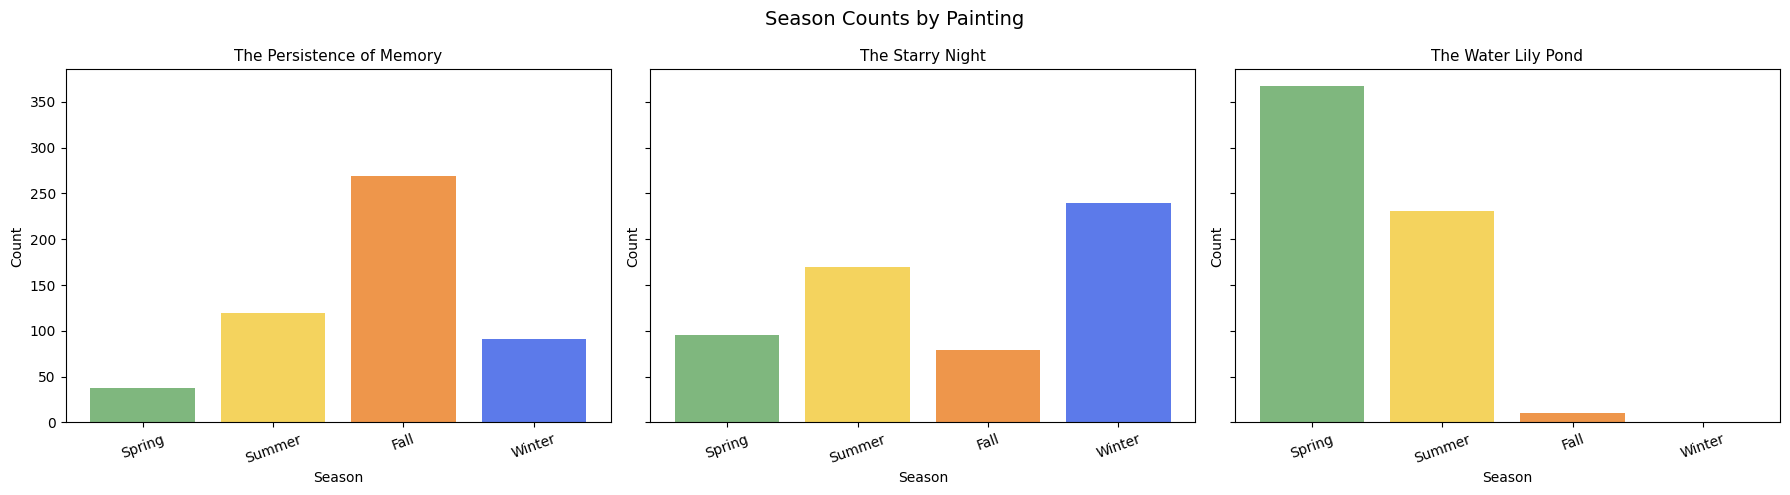

In [122]:
# three horizontal subplots (one per painting), each with four season counts
season_cols = ['spring', 'summer', 'fall', 'winter']
missing_seasons = [c for c in season_cols if c not in train_data.columns]
if missing_seasons:
    raise ValueError(f'Missing season columns: {missing_seasons}')

painting_cols = sorted([c for c in train_data.columns if c.startswith('painting_')])
if len(painting_cols) < 3:
    raise ValueError(f'Expected at least 3 painting columns, found {len(painting_cols)}: {painting_cols}')

selected_painting_cols = painting_cols[:3]
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ['#7FB77E', '#F4D35E', '#EE964B', '#5C7AEA']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, p_col in zip(axes, selected_painting_cols):
    mask = train_data[p_col].astype(bool)
    season_counts = train_data.loc[mask, season_cols].sum().reindex(season_cols).astype(int)

    ax.bar(season_labels, season_counts.values, color=colors)
    ax.set_title(p_col.replace('painting_', ''), fontsize=11)
    ax.set_xlabel('Season')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

plt.suptitle('Season Counts by Painting', fontsize=14)
plt.tight_layout()
plt.show()


The seasonal associations vary substantially across the three paintings.

For The Persistence of Memory, responses are most frequently associated with Fall, followed by Summer, while Spring appears least selected. Winter has a moderate count but remains noticeably lower than Fall. This suggests that viewers primarily perceive this painting as having autumnal qualities.

In contrast, The Starry Night shows a strong association with Winter, which has the highest count by a considerable margin. Summer and Spring receive moderate selections, whereas Fall is the least frequently chosen. This indicates that viewers tend to interpret the painting as evoking colder or winter-like imagery.

For The Water Lily Pond, Spring overwhelmingly dominates the responses, followed by Summer. Fall is selected only rarely, and Winter is almost absent. This pattern suggests that viewers strongly associate this painting with warmer and more vibrant seasonal themes.

Overall, each painting exhibits a distinct seasonal pattern, highlighting how visual characteristics may shape viewers’ seasonal interpretations.

In [123]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   unique_id                           1686 non-null   int64  
 1   emotion_rating                      1621 non-null   float64
 2   feel_describe                       1611 non-null   object 
 3   sombre                              1616 non-null   float64
 4   content                             1614 non-null   float64
 5   calm                                1615 non-null   float64
 6   uneasy                              1615 non-null   float64
 7   colors                              1612 non-null   float64
 8   objects                             1612 non-null   float64
 9   price                               1611 non-null   object 
 10  room                                1606 non-null   object 
 11  exhibition_with                     1610 no

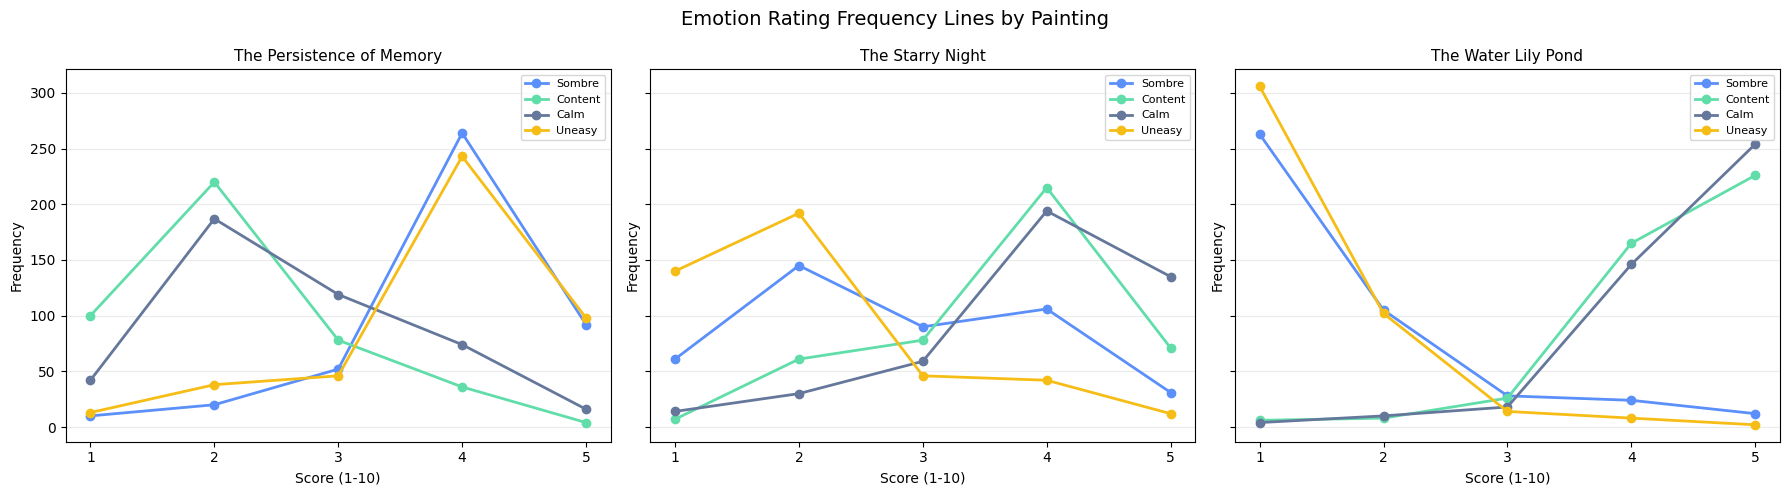

In [124]:
# frequency line plots of emotion ratings by painting
rating_cols = ['sombre', 'content', 'calm', 'uneasy']
missing_ratings = [c for c in rating_cols if c not in train_data.columns]
if missing_ratings:
    raise ValueError(f'Missing rating columns: {missing_ratings}')

painting_cols = sorted([c for c in train_data.columns if c.startswith('painting_')])
if len(painting_cols) < 3:
    raise ValueError(f'Expected at least 3 painting columns, found {len(painting_cols)}: {painting_cols}')

selected_painting_cols = painting_cols[:3]
score_axis = list(range(1, 6))
colors = {
    'sombre': '#5B8FF9',
    'content': '#61DDAA',
    'calm': '#65789B',
    'uneasy': '#F6BD16'
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, p_col in zip(axes, selected_painting_cols):
    mask = train_data[p_col].astype(bool)

    for rating in rating_cols:
        vals = pd.to_numeric(train_data.loc[mask, rating], errors='coerce').dropna().astype(int)
        freq = vals.value_counts().reindex(score_axis, fill_value=0)
        ax.plot(score_axis, freq.values, marker='o', linewidth=2, label=rating.capitalize(), color=colors[rating])

    ax.set_title(p_col.replace('painting_', ''), fontsize=11)
    ax.set_xlabel('Score (1-10)')
    ax.set_ylabel('Frequency')
    ax.set_xticks(score_axis)
    ax.grid(axis='y', alpha=0.25)
    ax.legend(fontsize=8)

plt.suptitle('Emotion Rating Frequency Lines by Painting', fontsize=14)
plt.tight_layout()
plt.show()


The emotion rating distributions differ substantially across the three paintings, revealing distinct emotional profiles.

For The Persistence of Memory, sombre and uneasy ratings peak at score 4, indicating that viewers tend to perceive the painting as moderately negative or tense rather than extremely intense. Content ratings concentrate around score 2, while calm responses are more evenly distributed across mid-level scores. Overall, the emotional tone appears moderately sombre and uneasy.

In contrast, The Starry Night exhibits higher frequencies for content and calm at score 4, suggesting that viewers generally associate the painting with positive and tranquil emotions. Uneasy ratings are more concentrated at lower scores (1–2), indicating that discomfort is not strongly evoked. The emotional distribution appears more balanced and generally positive.

For The Water Lily Pond, the pattern is notably polarized. Sombre and uneasy ratings are heavily concentrated at score 1, while calm and content ratings peak at score 5. This sharp contrast suggests that viewers overwhelmingly interpret the painting as calm and pleasant, with very little negative emotional association.


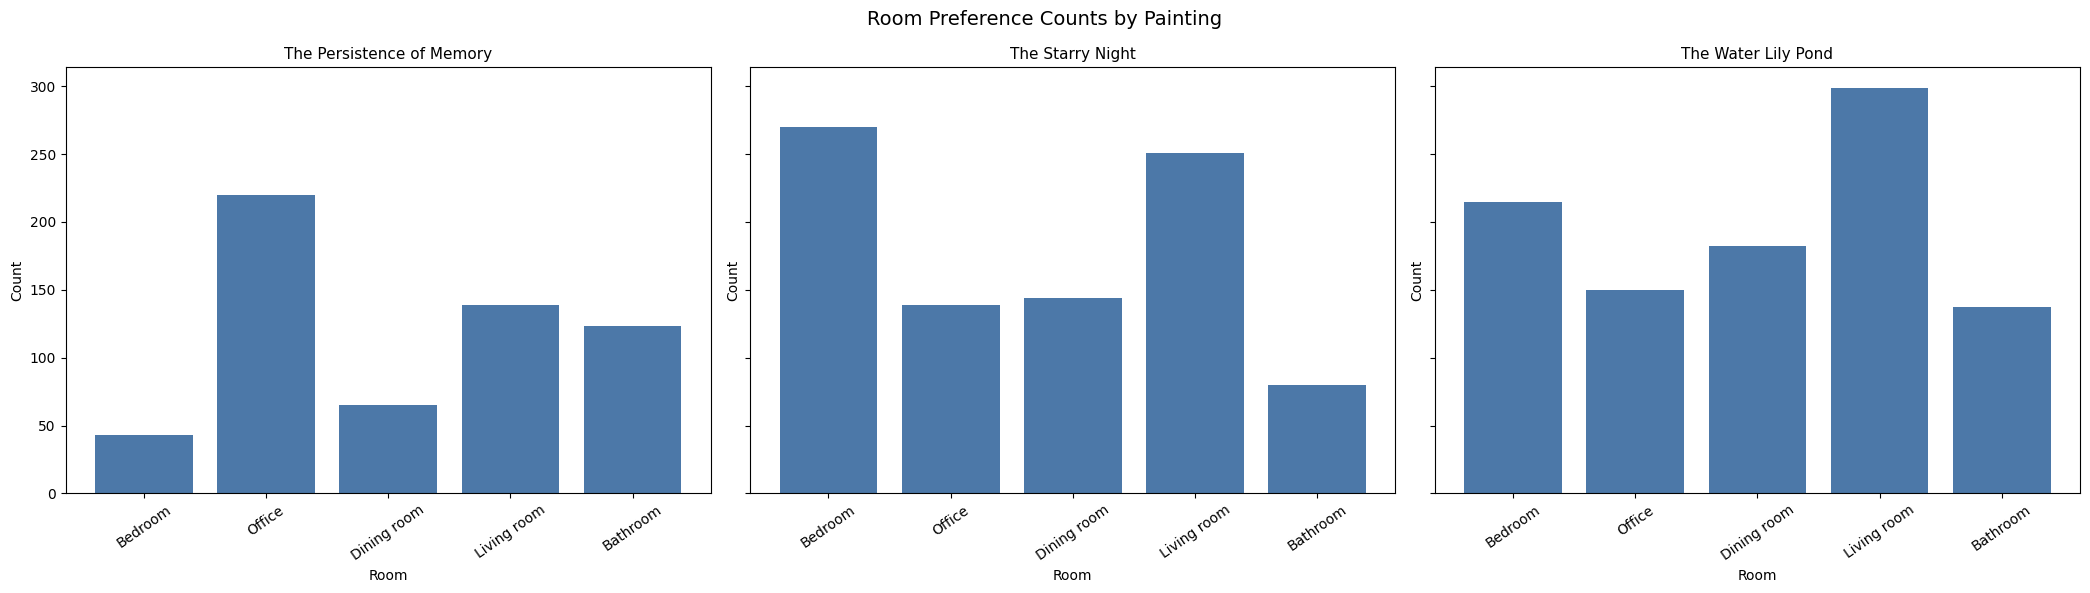

In [125]:
# room counts by painting (bar chart per painting)
if 'room' not in train_data.columns:
    raise ValueError("Missing 'room' column in train_data")

painting_cols = sorted([c for c in train_data.columns if c.startswith('painting_')])
if len(painting_cols) < 3:
    raise ValueError(f'Expected at least 3 painting columns, found {len(painting_cols)}: {painting_cols}')

selected_painting_cols = painting_cols[:3]
selected_paintings = [c.replace('painting_', '') for c in selected_painting_cols]

# Recover painting name from one-hot columns
painting_name = (
    train_data[selected_painting_cols]
    .idxmax(axis=1)
    .str.replace('painting_', '', regex=False)
)

room_df = train_data.copy()
room_df['painting_name'] = painting_name
room_df['room'] = room_df['room'].fillna('').astype(str)
room_df['room'] = room_df['room'].str.split(',')
room_df = room_df.explode('room')
room_df['room'] = room_df['room'].str.strip()
room_df = room_df[room_df['room'] != '']

# Keep a fixed room order for all subplots (based on first appearance in the dataset)
room_order = room_df['room'].drop_duplicates().tolist()

fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

for ax, painting in zip(axes, selected_paintings):
    sub = room_df[room_df['painting_name'] == painting]
    counts = sub['room'].value_counts().reindex(room_order, fill_value=0)

    ax.bar(counts.index, counts.values, color='#4C78A8')
    ax.set_title(painting, fontsize=11)
    ax.set_xlabel('Room')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=35)

plt.suptitle('Room Preference Counts by Painting', fontsize=14)
plt.tight_layout()
plt.show()


Room preference patterns differ noticeably across the three paintings, suggesting that viewers associate each artwork with distinct spatial contexts.

For The Persistence of Memory, the Office receives the highest number of selections, followed by the Living room. Bedroom and Dining room are less frequently chosen. This distribution suggests that viewers may perceive the painting as more suitable for contemplative or work-related environments rather than social or intimate spaces.

In contrast, The Starry Night shows the strongest preference for the Bedroom, closely followed by the Living room. The Office and Dining room receive moderate support, while the Bathroom is the least selected. This pattern implies that viewers may associate the painting with personal or relaxing spaces, reflecting its emotional and atmospheric qualities.

For The Water Lily Pond, the Living room is overwhelmingly the most preferred location, followed by the Bedroom and Dining room. The Office and Bathroom are less frequently selected. This indicates that viewers strongly associate the painting with shared, open, and aesthetically pleasing spaces, consistent with its calm and harmonious visual style.

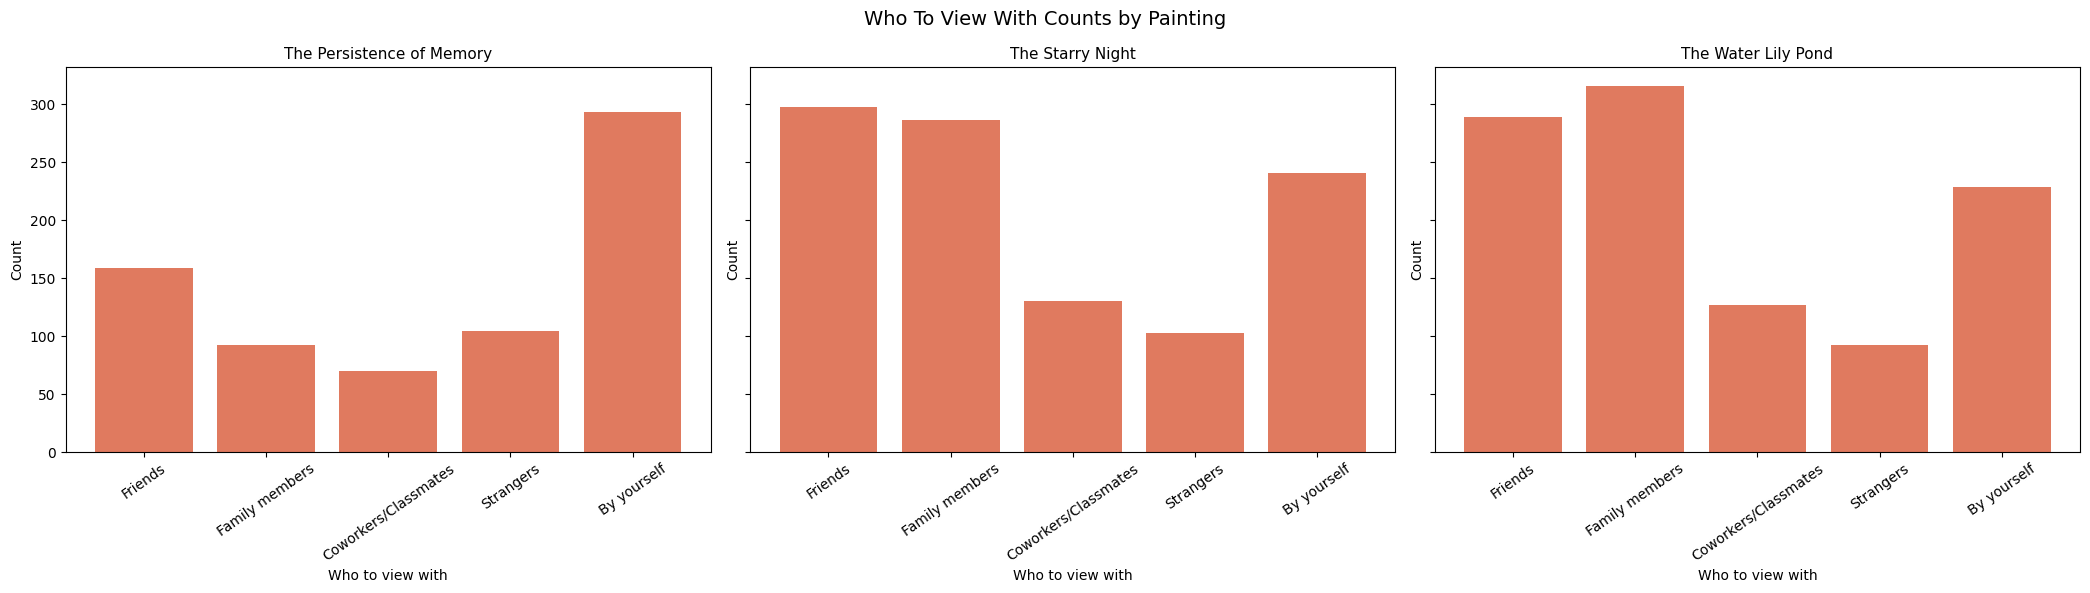

In [126]:
# exhibition_with counts by painting (bar chart per painting)
if 'exhibition_with' not in train_data.columns:
    raise ValueError("Missing 'exhibition_with' column in train_data")

painting_cols = sorted([c for c in train_data.columns if c.startswith('painting_')])
if len(painting_cols) < 3:
    raise ValueError(f'Expected at least 3 painting columns, found {len(painting_cols)}: {painting_cols}')

selected_painting_cols = painting_cols[:3]
selected_paintings = [c.replace('painting_', '') for c in selected_painting_cols]

painting_name = (
    train_data[selected_painting_cols]
    .idxmax(axis=1)
    .str.replace('painting_', '', regex=False)
)

with_df = train_data.copy()
with_df['painting_name'] = painting_name
with_df['exhibition_with'] = with_df['exhibition_with'].fillna('').astype(str)
with_df['exhibition_with'] = with_df['exhibition_with'].str.split(',')
with_df = with_df.explode('exhibition_with')
with_df['exhibition_with'] = with_df['exhibition_with'].str.strip()
with_df = with_df[with_df['exhibition_with'] != '']

# Fixed x-axis order across all painting subplots
with_order = with_df['exhibition_with'].drop_duplicates().tolist()

fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

for ax, painting in zip(axes, selected_paintings):
    sub = with_df[with_df['painting_name'] == painting]
    counts = sub['exhibition_with'].value_counts().reindex(with_order, fill_value=0)

    ax.bar(counts.index, counts.values, color='#E07A5F')
    ax.set_title(painting, fontsize=11)
    ax.set_xlabel('Who to view with')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=35)

plt.suptitle('Who To View With Counts by Painting', fontsize=14)
plt.tight_layout()
plt.show()


Companion preferences differ across paintings. The Persistence of Memory is most often preferred for solitary viewing, whereas The Starry Night and The Water Lily Pond are more frequently associated with viewing alongside friends and family members, indicating stronger social viewing tendencies.

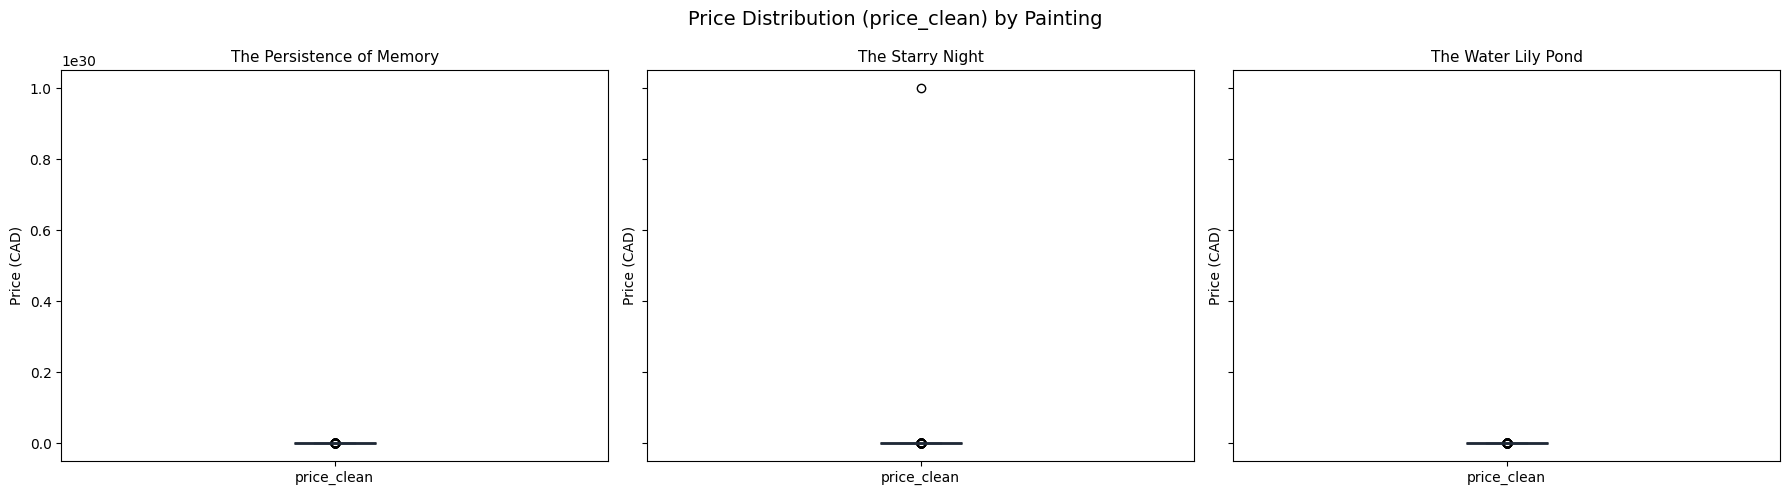

In [127]:
# Visualization 5: price_clean boxplot by painting
if 'price_clean' not in train_data.columns:
    raise ValueError("Missing 'price_clean' column in train_data")

painting_cols = sorted([c for c in train_data.columns if c.startswith('painting_')])
if len(painting_cols) < 3:
    raise ValueError(f'Expected at least 3 painting columns, found {len(painting_cols)}: {painting_cols}')

selected_painting_cols = painting_cols[:3]
selected_paintings = [c.replace('painting_', '') for c in selected_painting_cols]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, p_col, painting in zip(axes, selected_painting_cols, selected_paintings):
    mask = train_data[p_col].astype(bool)
    vals = pd.to_numeric(train_data.loc[mask, 'price_clean'], errors='coerce').dropna()

    ax.boxplot(vals.values, patch_artist=True,
               boxprops=dict(facecolor='#8EC9A7', alpha=0.8),
               medianprops=dict(color='#1F2937', linewidth=2),
               whiskerprops=dict(color='#1F2937'),
               capprops=dict(color='#1F2937'))
    ax.set_title(painting, fontsize=11)
    ax.set_ylabel('Price (CAD)')
    ax.set_xticks([1])
    ax.set_xticklabels(['price_clean'])

plt.suptitle('Price Distribution (price_clean) by Painting', fontsize=14)
plt.tight_layout()
plt.show()


Since a small number of extreme responses disproportionately affect the scale, we excluded implausible price values to prevent distortion of the distribution. This adjustment allows the visualization to more accurately reflect the central tendency and spread of realistic responses.

In [132]:
# Filter out extreme price outliers (> 1e9) in split datasets
for name in ['train_data', 'test_data']:
    if name not in globals():
        raise ValueError(f"Missing '{name}'. Run the train/test split cell first.")

if 'price_clean' not in train_data.columns:
    raise ValueError("Missing 'price_clean' column in train_data")

train_before = len(train_data)
test_before = len(test_data)

train_data = train_data[(train_data['price_clean'].isna()) | (train_data['price_clean'] <= 1_000_000_000)].copy()
test_data = test_data[(test_data['price_clean'].isna()) | (test_data['price_clean'] <= 1_000_000_000)].copy()

train_after = len(train_data)
test_after = len(test_data)

print(f'Train rows before filter: {train_before}')
print(f'Train rows after filter: {train_after}')
print(f'Train removed (price_clean > 1e9): {train_before - train_after}')
print(f'Test rows before filter: {test_before}')
print(f'Test rows after filter: {test_after}')
print(f'Test removed (price_clean > 1e9): {test_before - test_after}')
print('Train max price_clean after filter:', train_data['price_clean'].max(skipna=True))


Train rows before filter: 1347
Train rows after filter: 1342
Train removed (price_clean > 1e9): 5
Test rows before filter: 339
Test rows after filter: 338
Test removed (price_clean > 1e9): 1
Train max price_clean after filter: 1000000000.0


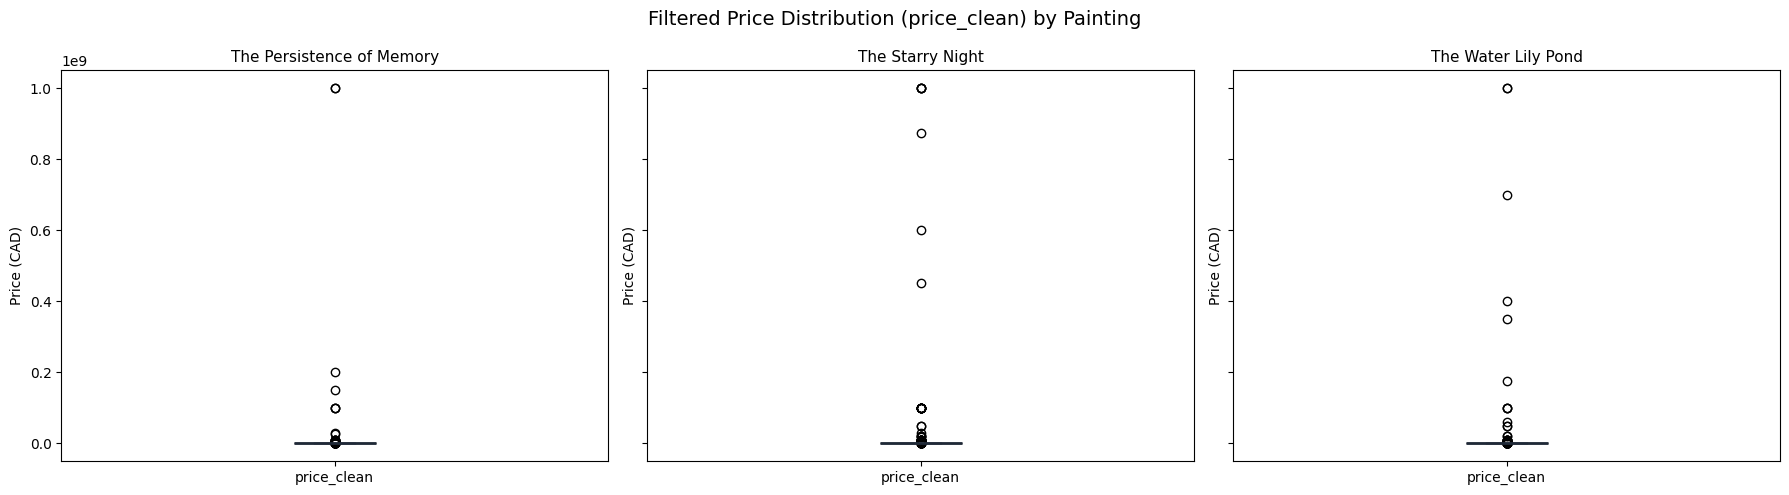

In [134]:
# price_clean boxplot by painting (after filtering > 1e9)

painting_cols = sorted([c for c in train_data.columns if c.startswith('painting_')])
if len(painting_cols) < 3:
    raise ValueError(f'Expected at least 3 painting columns, found {len(painting_cols)}: {painting_cols}')

selected_painting_cols = painting_cols[:3]
selected_paintings = [c.replace('painting_', '') for c in selected_painting_cols]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, p_col, painting in zip(axes, selected_painting_cols, selected_paintings):
    mask = train_data[p_col].astype(bool)
    vals = pd.to_numeric(train_data.loc[mask, 'price_clean'], errors='coerce').dropna()

    ax.boxplot(
        vals.values,
        patch_artist=True,
        boxprops=dict(facecolor='#9EC5FE', alpha=0.85),
        medianprops=dict(color='#1F2937', linewidth=2),
        whiskerprops=dict(color='#1F2937'),
        capprops=dict(color='#1F2937')
    )
    ax.set_title(painting, fontsize=11)
    ax.set_ylabel('Price (CAD)')
    ax.set_xticks([1])
    ax.set_xticklabels(['price_clean'])

plt.suptitle('Filtered Price Distribution (price_clean) by Painting', fontsize=14)
plt.tight_layout()
plt.show()


Although the extreme values have been reduced, the remaining high-end outliers can still substantially influence downstream machine learning models. In particular, when building a classification model that includes price as a feature, excessively large price values may distort the scale of the variable and dominate the learning process.

For models that are sensitive to feature magnitude, such as logistic regression, k-nearest neighbors, or neural networks, extreme price values can:
-Skew the decision boundary by disproportionately weighting rare high-price observations

-Increase variance and reduce model stability

-Lead to poor generalization performance on unseen data

-Cause numerical instability during optimization.

Therefore, retaining unrealistic or highly exaggerated price responses can introduce noise and bias into the classification task. Removing or capping extreme outliers helps ensure that the model learns patterns representative of realistic viewer valuations rather than being influenced by a small number of atypical responses.